In [1]:
import pandas as pd
import preprocessing as pp
import utils as utils
from sklearn import tree
import numpy as np
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
import random
seed = 100
np.random.seed(seed)
random.seed(seed)

In [3]:
X, y = utils.importar_datos()

### Modelo 1

- Preprocesamiento con OneHotEncoding
- Hiperparametros por defecto

In [4]:
preprocessor = pp.PreprocessingOHE()
model = tree.DecisionTreeClassifier(random_state=pp.RANDOM_STATE)

In [5]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

#### Metricas

In [6]:
utils.metricas_cross_validation(X, y, pipeline)

,Mean,Std,Oof,Max,Min
roc auc,0.758420,0.039222,0.756881,0.845713,0.713115
accuracy,0.786522,0.036339,0.786517,0.870000,0.750000
precision,0.727698,0.054067,0.723684,0.837838,0.652174
recall,0.717105,0.075309,0.716612,0.815789,0.589744
f1 score,0.719468,0.049283,0.720131,0.826667,0.647887


### Modelo 2

- Preprocesamiento con OneHotEncoding
- Hiperparametros por defecto

In [7]:
preprocessor = pp.PreprocessingOHE()
model = tree.DecisionTreeClassifier(random_state=pp.RANDOM_STATE)

In [8]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

#### Metricas

In [9]:
utils.metricas_cross_validation(X, y, pipeline)

,Mean,Std,Oof,Max,Min
roc auc,0.758420,0.039222,0.756881,0.845713,0.713115
accuracy,0.786522,0.036339,0.786517,0.870000,0.750000
precision,0.727698,0.054067,0.723684,0.837838,0.652174
recall,0.717105,0.075309,0.716612,0.815789,0.589744
f1 score,0.719468,0.049283,0.720131,0.826667,0.647887


### Modelo 3 

- Preprocesamiento con LabelEncoder
- Estimación de Hiperparametros con GridSearchCV

In [13]:
preprocessor = pp.PreprocessingOHE()
model = tree.DecisionTreeClassifier(random_state=pp.RANDOM_STATE)

In [14]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

In [15]:
from sklearn.model_selection import GridSearchCV
params = {'model__max_depth': [10, 20, 50, None], 'model__min_samples_leaf': [1, 5, 10, 15, 20],
          "model__min_samples_split": [2, 5, 10, 15], "model__criterion": ["gini", "entropy"], 
          "model__max_features": ["auto", "log2", 7, 2]}
cv = utils.kfold_for_cross_validation()
gscv = GridSearchCV(pipeline, params, scoring='roc_auc', n_jobs=-1, cv=cv, return_train_score=True).fit(X, y)
print(gscv.best_params_)
print(gscv.best_score_)

{'model__criterion': 'gini', 'model__max_depth': 10, 'model__max_features': 7, 'model__min_samples_leaf': 15, 'model__min_samples_split': 2}
0.8610897980061817


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'model__max_depth': np.arange(10,25), 'model__min_samples_leaf': np.arange(3,10),
         "model__min_samples_split": np.arange(1,7), 
          "model__max_features": ["auto", "log2"]+list(np.arange(5,10)),
         "model__criterion": ["gini", "entropy"]}
cv = utils.kfold_for_cross_validation()
gscv = GridSearchCV(pipeline, params, scoring='roc_auc', n_jobs=-1, cv=cv, return_train_score=True).fit(X, y)
print(gscv.best_params_)
print(gscv.best_score_)

In [18]:
model = tree.DecisionTreeClassifier(random_state=pp.RANDOM_STATE, 
                               max_depth=13, 
                               min_samples_leaf=6, min_samples_split=2,max_features=6)

In [19]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

In [20]:
utils.metricas_cross_validation(X, y, pipeline)

,Mean,Std,Oof,Max,Min
roc auc,0.829571,0.023515,0.831460,0.867452,0.787516
accuracy,0.797760,0.021571,0.797753,0.820000,0.750000
precision,0.791198,0.053733,0.786561,0.884615,0.694444
recall,0.648111,0.027007,0.648208,0.692308,0.605263
f1 score,0.711085,0.022486,0.710714,0.750000,0.666667


### Metricas finales

Se eligió el [Modelo 3](#Modelo-3) en base a los resultados obtenidos mediante `cross_validation`.

In [21]:
preprocessor = pp.PreprocessingLE()
model = tree.DecisionTreeClassifier(random_state=pp.RANDOM_STATE, 
                               max_depth=13, 
                               min_samples_leaf=6, min_samples_split=2,max_features=6)

In [22]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

AUC_ROC,Accuracy,Precision,Recall,F1 Score
0.908406,0.859504,0.853659,0.760870,0.804598


Matriz de confusión:


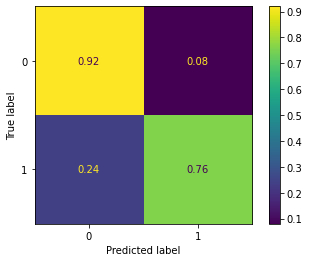

In [23]:
pipeline = utils.entrenar_y_realizar_prediccion_final_con_metricas(X, y, pipeline)

Como puede verse, la métrica objetivo AUC-ROC tiene un buen resultado en este modelo. Lo que no se logra es un buen resultado de Recall y eso puede verse también en la matriz de confusión: De los casos verdaderamente positivos el modelo selecciona como negativos al 24%, esa tasa de Falsos Negativos perjudica el resultado de todas las metricas, pero principalmente al Recall (recordando que `Recall = TP / (TP + FN)`.

### Predicción HoldOut

In [ ]:
utils.predecir_holdout_y_generar_csv(pipeline, 'Predicciones/1-ArbolDeDecision.csv')